# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
#28X28 images are flattened and stored as an array of 784 pixel values
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [8]:
mnist.train.images[1].shape

(784,)

In [9]:
mnist.train.images[1].min()

0.0

In [10]:
mnist.train.images[1].max()

1.0

### Visualizing the Data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

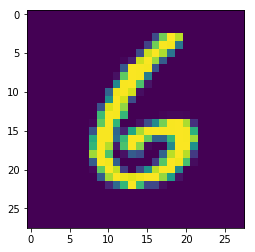

In [12]:
plt.imshow(mnist.train.images[1000].reshape(28,28))

In [13]:
batch_x , batch_y = mnist.train.next_batch(100)

In [14]:
batch_x.shape

(100, 784)

In [15]:
batch_y.shape

(100, 10)

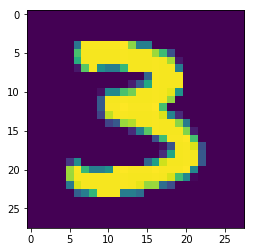

In [16]:
plt.imshow(batch_x[50].reshape(28,28))

In [17]:
batch_y[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [18]:
print(batch_y[50].argmax())

3


## Create the Model

In [19]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [20]:
# 10 sets of 784 weights
W = tf.Variable(tf.zeros([784,10]))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
#10 biases - one for each neuron
b = tf.Variable(tf.zeros([10]))

In [22]:
# Net input value
I = tf.matmul(x,W) + b 

Loss and Optimizer

In [23]:
#labels
y_true = tf.placeholder(tf.float32,[None,10])

In [ ]:
#define loss function

In [24]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=I)
loss_function = tf.reduce_mean(individual_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [44]:
#optimize the loss using gradient descent optimizer

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [26]:
train = optimizer.minimize(loss_function)

### Create Session

In [27]:
init = tf.global_variables_initializer()

In [28]:
sess=tf.Session()
sess.run(init)

In [29]:
# Train the model for 1000 steps on the training set
# Using built in batch feeder from mnist for convenience
    
for step in range(1000):
    batch_x , batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
     

In [30]:
 #training done...now testing

matches = tf.equal(tf.argmax(I,1),tf.argmax(y_true,1))
    
acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9147


In [31]:
sess.close()